In [1]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

In [3]:
def printToken(token):
    print(token.text, "->", token.dep_)

In [4]:
def appendChunk(original, chunk):
    return original + ' ' + chunk

In [5]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [6]:
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [7]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        #printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

In [8]:
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

In [9]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
          node_size=500, node_color='seagreen', alpha=0.9,
          labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

In [18]:
text = "The Netherlands informally Holland,is a country primarily located in Western Europe and partly in the Caribbean,"\
        "forming the largest constituent country of the Kingdom of the Netherlands,"\
        "The country's official language is Dutch, with West Frisian as a secondary,"\
        "The four largest cities in the Netherlands are Amsterdam, Rotterdam, The Hague and Utrecht."\
        "Netherlands literally means 'lower countries' in reference to its low elevation and flat topography."\
        "The Netherlands is geographically very low relative to sea level and is considered a flat country."\
        "Amsterdam is the financial and business capital of the Netherlands"

In [19]:
sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')

In [20]:
triples = [] # triple, that is a set of three items(a subject, a predicate and an object
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))

The Netherlands informally Holland,is a country primarily located in Western Europe and partly in the Caribbean,forming the largest constituent country of the Kingdom of the Netherlands,The country's official language is Dutch, with West Frisian as a secondary,The four largest cities in the Netherlands are Amsterdam, Rotterdam, The Hague and Utrecht.Netherlands literally means 'lower countries' in reference to its low elevation and flat topography.The Netherlands is geographically very low relative to sea level and is considered a flat country.Amsterdam is the financial and business capital of the Netherlands
Netherlands language cities , be country large official large Amsterdam , Europe Caribbean country Kingdom Netherlands Frisian secondary Netherlands
Netherlands , mean low low flat , countries reference elevation
Netherlands , be flat , level
Amsterdam , be financial capital , Netherlands


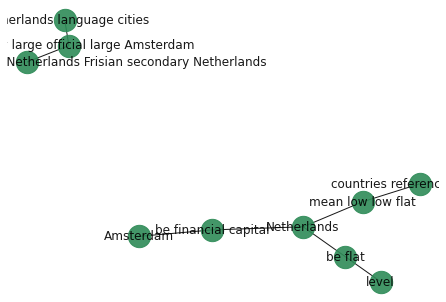

In [21]:
printGraph(triples)